In [1]:
import cifar10
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
#Already given
cifar10.data_path = "data/CIFAR-10/"

In [3]:
#Already given
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
#Already given
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
#Already given
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


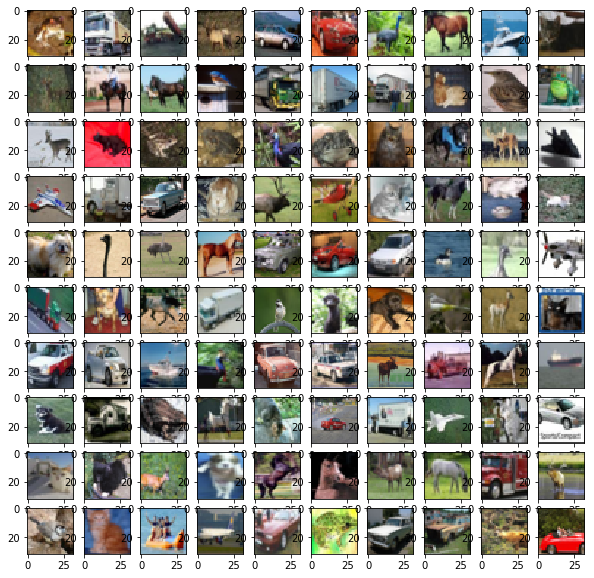

In [6]:
#Seeing the train images
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

In [7]:
#Dividing the data into train and test as given
images_train.shape
x_train=images_train.reshape((50000,3072))
x_test=images_test.reshape((10000,3072))
y_train=cls_train
y_test=cls_test

In [8]:
#Using PCA
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
total=pca.explained_variance_.sum()
k=0
cur_variance=0
while (cur_variance/total)<0.95:
    cur_variance += pca.explained_variance_[k]
    k=k+1
print(k)

217


In [10]:
pca1 = PCA(n_components = k,whiten=True)
x_train_pca = pca1.fit_transform(x_train)
x_train_pca.shape

(50000, 217)

In [11]:
x_approx=pca1.inverse_transform(x_train_pca)
print(x_approx.shape)

(50000, 3072)


In [12]:
images_approx=x_approx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

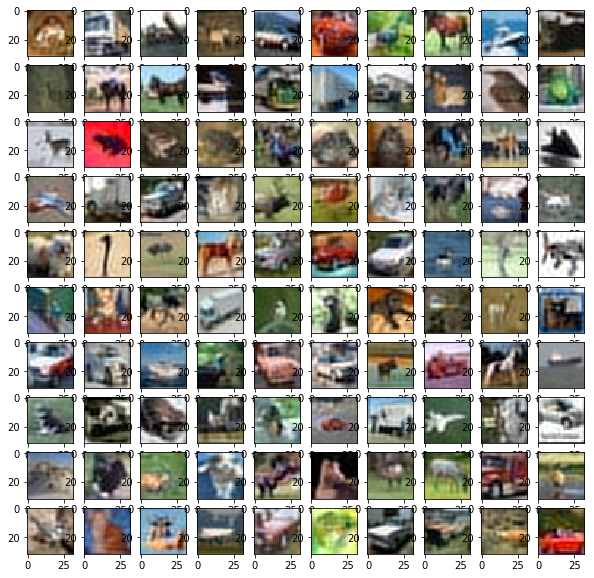

In [13]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_approx[i],cmap=plt.cm.bone)
plt.show()

In [14]:
x_test_pca=pca1.transform(x_test)

In [15]:
#Using random forest to classify data
rf2=ensemble.RandomForestClassifier()
start=time.time()
rf2.fit(x_train_pca,y_train)
end=time.time()
y_pred=rf2.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(end-start)
print(rf2.score)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.28      0.44      0.34      1000
           1       0.30      0.40      0.35      1000
           2       0.19      0.26      0.22      1000
           3       0.19      0.20      0.20      1000
           4       0.26      0.27      0.26      1000
           5       0.24      0.19      0.21      1000
           6       0.32      0.27      0.29      1000
           7       0.30      0.19      0.23      1000
           8       0.46      0.36      0.40      1000
           9       0.35      0.21      0.26      1000

   micro avg       0.28      0.28      0.28     10000
   macro avg       0.29      0.28      0.28     10000
weighted avg       0.29      0.28      0.28     10000

[[442  85 106  53  48  42  31  44 108  41]
 [129 402  56  85  44  55  41  41  54  93]
 [148  77 258 109 161  64  89  46  29  19]
 [109 100 156 200  75 138  76  55  38  53]
 [104  61 206  87 270  62  96  60  31  23]
 [116  92 137 178  91 191 

In [16]:
#Using rf without pca
rf1=ensemble.RandomForestClassifier()
start=time.time()
rf1.fit(x_train,y_train)
end=time.time()
y_pred=rf1.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(end-start)
print(rf1.score(x_test,y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.39      0.52      0.45      1000
           1       0.38      0.47      0.42      1000
           2       0.24      0.30      0.27      1000
           3       0.23      0.23      0.23      1000
           4       0.33      0.31      0.32      1000
           5       0.31      0.26      0.28      1000
           6       0.38      0.35      0.36      1000
           7       0.40      0.29      0.34      1000
           8       0.55      0.49      0.52      1000
           9       0.46      0.37      0.41      1000

   micro avg       0.36      0.36      0.36     10000
   macro avg       0.37      0.36      0.36     10000
weighted avg       0.37      0.36      0.36     10000

[[524  68  79  36  35  22  18  32 135  51]
 [ 69 474  49  66  29  39  43  36  61 134]
 [131  69 305  88 133  75 110  49  21  19]
 [ 84  93 125 233  92 158  98  54  23  40]
 [ 71  36 198  79 309  71 122  64  31  19]
 [ 73  68 139 187  77 264 

In [17]:
#Using SVM as classifier
clf=svm.SVC()
clf.fit(x_train_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred=clf.predict(x_test_pca)

In [69]:
#Writing the predicted values in file
import numpy as np
np.savetxt("/Users/simrankaur/Desktop/ML_bals/output.csv",y_pred)

In [22]:
print(clf.score(x_test_pca,y_test))

0.5542


In [68]:
import pandas as pd

(10000,)


In [77]:
#Converting the integer classes into string classes as given above as class_names
#Giving the heading as f1 so that it can be deleted later
data=pd.read_csv("/Users/simrankaur/Desktop/ML_bals/output.csv",names = ["f1"])
print(data)
def f(num):
    if num==0:
        return "airplane"
    if num==1:
        return "automobile"
    if num==2:
        return "bird"
    if num==3:
        return "cat"
    if num==4:
        return "deer"
    if num==5:
        return "dog"
    if num==6:
        return "frog"
    if num==7:
        return "horse"
    if num==8:
        return "ship"
    if num==9:
        return "truck"
data["class"]=data.iloc[:,0].apply(f)

       f1
0     3.0
1     8.0
2     8.0
3     0.0
4     6.0
5     6.0
6     1.0
7     6.0
8     3.0
9     1.0
10    8.0
11    9.0
12    2.0
13    7.0
14    9.0
15    8.0
16    5.0
17    7.0
18    8.0
19    6.0
20    7.0
21    0.0
22    0.0
23    9.0
24    4.0
25    6.0
26    3.0
27    0.0
28    9.0
29    6.0
...   ...
9970  2.0
9971  9.0
9972  6.0
9973  8.0
9974  1.0
9975  7.0
9976  2.0
9977  6.0
9978  4.0
9979  3.0
9980  0.0
9981  4.0
9982  7.0
9983  1.0
9984  4.0
9985  9.0
9986  8.0
9987  8.0
9988  8.0
9989  4.0
9990  7.0
9991  9.0
9992  3.0
9993  3.0
9994  3.0
9995  3.0
9996  5.0
9997  5.0
9998  5.0
9999  7.0

[10000 rows x 1 columns]


In [80]:
print(data)
del data['f1']

       f1       class
0     3.0         cat
1     8.0        ship
2     8.0        ship
3     0.0    airplane
4     6.0        frog
5     6.0        frog
6     1.0  automobile
7     6.0        frog
8     3.0         cat
9     1.0  automobile
10    8.0        ship
11    9.0       truck
12    2.0        bird
13    7.0       horse
14    9.0       truck
15    8.0        ship
16    5.0         dog
17    7.0       horse
18    8.0        ship
19    6.0        frog
20    7.0       horse
21    0.0    airplane
22    0.0    airplane
23    9.0       truck
24    4.0        deer
25    6.0        frog
26    3.0         cat
27    0.0    airplane
28    9.0       truck
29    6.0        frog
...   ...         ...
9970  2.0        bird
9971  9.0       truck
9972  6.0        frog
9973  8.0        ship
9974  1.0  automobile
9975  7.0       horse
9976  2.0        bird
9977  6.0        frog
9978  4.0        deer
9979  3.0         cat
9980  0.0    airplane
9981  4.0        deer
9982  7.0       horse
9983  1.0 

In [82]:
#writing the final predicted classes to file.
#header=None for no headings. index=False so that the row index(0,1,-----9999) do not come in the CSV file
print(data)
data.to_csv('/Users/simrankaur/Desktop/ML_bals/output.csv',header=None,index=False,sep='\t', encoding='utf-8')

           class
0            cat
1           ship
2           ship
3       airplane
4           frog
5           frog
6     automobile
7           frog
8            cat
9     automobile
10          ship
11         truck
12          bird
13         horse
14         truck
15          ship
16           dog
17         horse
18          ship
19          frog
20         horse
21      airplane
22      airplane
23         truck
24          deer
25          frog
26           cat
27      airplane
28         truck
29          frog
...          ...
9970        bird
9971       truck
9972        frog
9973        ship
9974  automobile
9975       horse
9976        bird
9977        frog
9978        deer
9979         cat
9980    airplane
9981        deer
9982       horse
9983  automobile
9984        deer
9985       truck
9986        ship
9987        ship
9988        ship
9989        deer
9990       horse
9991       truck
9992         cat
9993         cat
9994         cat
9995         cat
9996         d

In [67]:
y_pred.shape

(10000,)